<a href="https://colab.research.google.com/github/leoliu5550/colab_for_nn_homework/blob/master/save_and_use_nn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [44]:
import torch
import matplotlib.pyplot as plt

# Create DATA set

In [45]:
x = torch.unsqueeze(torch.linspace(-1, 1, 100), dim=1)  # x data (tensor), shape=(100, 1)
y = x.pow(2) + 0.2*torch.rand(x.size())  # noisy y data (tensor), shape=(100, 1)

## 訓練一個神經網路net1

In [46]:
net1 = torch.nn.Sequential(
    torch.nn.Linear(1,10),
    torch.nn.ReLU(),
    torch.nn.Linear(10,1)
)

In [47]:
#訓練100次
optimizer = torch.optim.SGD(net1.parameters(),lr=0.3)
loss_func = torch.nn.MSELoss()

for t in range(100):
  prediction = net1(x)
  loss = loss_func(prediction,y)
  optimizer.zero_grad()
  loss.backward()
  optimizer.step()

## 可視化net1模型

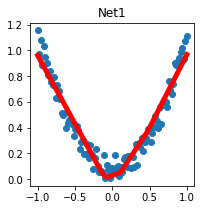

In [54]:
plt.figure(1, figsize=(10, 3))
plt.subplot(131)
plt.title('Net1')
plt.scatter(x.data.numpy(), y.data.numpy())
plt.plot(x.data.numpy(), prediction.data.numpy(), 'r-', lw=5)

# 儲存模型 2種方法

In [50]:
import os
os.chdir('/content/drive/My Drive/ML_assets')

## 方法一 存整個NN模型下去 pkl檔案


In [51]:
torch.save(net1, 'net.pkl')

## 方法二 存節點間的參數
Load時候需要建立一毛一樣的NN，但是導入時比較快

In [52]:
torch.save(net1.state_dict(), 'net_params.pkl')

# 載入上次訓練模型

## 方法1

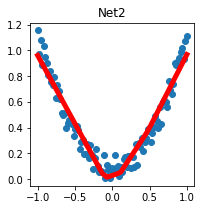

In [56]:
net2=torch.load('net.pkl')
prediction = net2(x)
#視覺化
plt.figure(2, figsize=(10, 3))
plt.subplot(132)
plt.title('Net2')
plt.scatter(x.data.numpy(), y.data.numpy())
plt.plot(x.data.numpy(), prediction.data.numpy(), 'r-', lw=5)

## 方法2

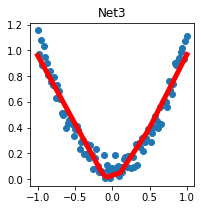

In [59]:
#建立和上次一樣的模型
net3 = torch.nn.Sequential(
    torch.nn.Linear(1,10),
    torch.nn.ReLU(),
    torch.nn.Linear(10,1)
)

# 放入上次存的權重
net3.load_state_dict(torch.load('net_params.pkl'))
prediction = net3(x)

#視覺化
plt.figure(3, figsize=(10, 3))
plt.subplot(133)
plt.title('Net3')
plt.scatter(x.data.numpy(), y.data.numpy())
plt.plot(x.data.numpy(), prediction.data.numpy(), 'r-', lw=5)

# 三種視覺化一起看

<function matplotlib.pyplot.show>

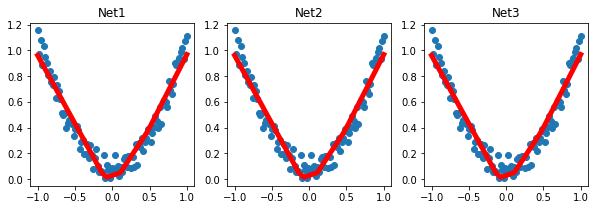

In [61]:
#net1
plt.figure(1, figsize=(10, 3))
plt.subplot(131)
plt.title('Net1')
plt.scatter(x.data.numpy(), y.data.numpy())
plt.plot(x.data.numpy(), prediction.data.numpy(), 'r-', lw=5)
#net2
plt.subplot(132)
plt.title('Net2')
plt.scatter(x.data.numpy(), y.data.numpy())
plt.plot(x.data.numpy(), prediction.data.numpy(), 'r-', lw=5)
#net3
plt.subplot(133)
plt.title('Net3')
plt.scatter(x.data.numpy(), y.data.numpy())
plt.plot(x.data.numpy(), prediction.data.numpy(), 'r-', lw=5)
plt.show